IRIS DATASET:

In [1]:
#IMPORT ALL IMPORTANT LIBRARIES:

%matplotlib inline

from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, neighbors, cluster
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib2

In [2]:
#LOADING THE DATASET:

iris_url = urllib2.urlopen("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

iris = pd.read_csv(iris_url, quotechar='"', skipinitialspace=True)

# Convert labels from strings to boolean
label_encoder = preprocessing.LabelEncoder()
iris_labels = pd.DataFrame(label_encoder.fit_transform(iris.iloc[:,1]))
# Convert nominal attributes to encoded versions
attr_encoder = feature_extraction.DictVectorizer(sparse=False)
iris_url = pd.DataFrame(attr_encoder.fit_transform(iris.iloc[:,:4].T.to_dict().values()))
iris_url.columns = attr_encoder.get_feature_names()

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


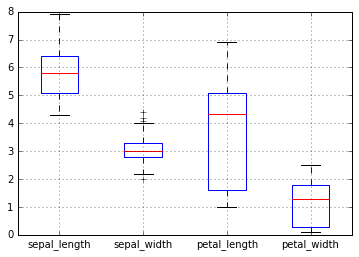

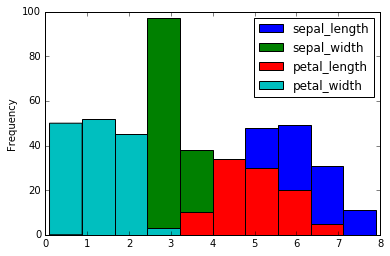

In [3]:
#DESCRIPTIVE STATISTICS AND DATA VISUALIZATION
print iris.describe()
iris.boxplot(return_type='axes')
plt.figure()
iris.plot(kind='hist')

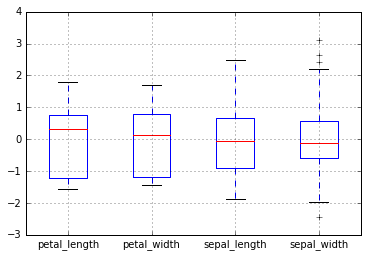

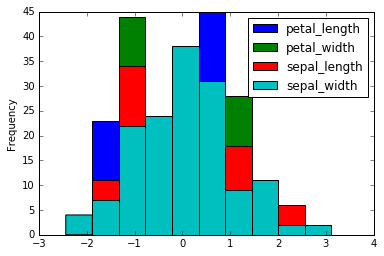

In [4]:
#DATA TRANSFORMATION
scaler= preprocessing.StandardScaler()
iris_scaled_values=scaler.fit_transform(iris_url.values)
iris_values=pd.DataFrame(iris_scaled_values,columns=iris_url.columns)
iris_values.boxplot(return_type='axes')
plt.figure()
iris_values.plot(kind='hist')

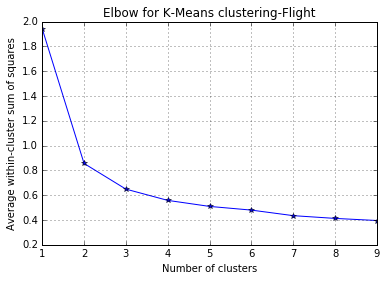

In [5]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

K = range(1,10)

  # scipy.cluster.vq.kmeans
KM = [kmeans(iris_url,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(iris_url, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/iris.shape[0] for d in dist] 
#print avgWithinSS
kIdx = 0
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx])
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering-Flight')  

In [6]:
def folds_to_split(data,targets,train,test):
    data_tr = pd.DataFrame(data).iloc[train]
    data_te = pd.DataFrame(data).iloc[test]
    labels_tr = pd.DataFrame(targets).iloc[train]
    labels_te = pd.DataFrame(targets).iloc[test]
    return [data_tr, data_te, labels_tr, labels_te]

In [7]:
foldnum=0
for train, test in cross_validation.KFold(len(iris_labels), shuffle=True, n_folds=4,
                                           random_state=20160217):
    foldnum+=1
    [iris_tr_data, iris_te_data, 
     iris_tr_targets, iris_te_targets] = folds_to_split(iris_url, iris_labels, train, test)

In [8]:
#KMEANS:

kmeans1=cluster.KMeans(n_clusters=8, init='random', n_init=10)
iris_means1=kmeans1.fit_transform(iris_te_targets)

kmeans2=cluster.KMeans(n_clusters=8, init='k-means++', n_init=10)
iris_means=kmeans2.fit_transform(iris_te_targets)

mK1=cluster.MiniBatchKMeans(n_clusters=8, init='random', max_iter=100, batch_size=100, tol=0.0, max_no_improvement=10, n_init=3, reassignment_ratio=0.01)
iris_mk=mK1.fit_transform(iris_te_targets)

mK2=cluster.MiniBatchKMeans(n_clusters=8, init='k-means++', max_iter=100, batch_size=100, tol=0.0, max_no_improvement=10, n_init=3, reassignment_ratio=0.01)
iris_mk2=mK2.fit_transform(iris_te_targets)



In [9]:

kmeans1.fit(iris_tr_data, iris_tr_targets)
kmeans2.fit(iris_tr_data, iris_tr_targets)
mK1.fit(iris_tr_data, iris_tr_targets)
mK2.fit(iris_tr_data, iris_tr_targets)

# Print out the coefficient of determination (R^2)
print "R^2:\t",kmeans1.score(iris_te_data,iris_te_targets)
print "R^2:\t",kmeans2.score(iris_te_data,iris_te_targets)
print "R^2:\t",mK1.score(iris_te_data,iris_te_targets)
print "R^2:\t",mK2.score(iris_te_data,iris_te_targets)

# Peek at the predictions
i_te_predict = kmeans1.predict(iris_te_data)
i_te_predict0 = kmeans2.predict(iris_te_data)
i_te_predict1 = mK1.predict(iris_te_data)
i_te_predict2 = mK2.predict(iris_te_data)

# And also the mean squared error:
print "MSE:\t", metrics.mean_squared_error(iris_te_targets, i_te_predict)
print "MSE:\t", metrics.mean_squared_error(iris_te_targets, i_te_predict0)
print "MSE:\t", metrics.mean_squared_error(iris_te_targets, i_te_predict1)
print "MSE:\t", metrics.mean_squared_error(iris_te_targets, i_te_predict2)

R^2:	-9.77217691309
R^2:	-8.11851982186
R^2:	-9.49148737052
R^2:	-9.46505893368
MSE:	65.8378378378
MSE:	56.8918918919
MSE:	54.0540540541
MSE:	64.1891891892


# Cluster Performance Evaluations:

In [10]:
from sklearn import metrics
label_true=test
#print test
label_pred=i_te_predict
label_pred0=i_te_predict0
label_pred1=i_te_predict1
label_pred2=i_te_predict2
#print w_te_predict
metrics.adjusted_rand_score(label_true, label_pred)

0.0

In [11]:
metrics.adjusted_mutual_info_score(label_true, label_pred)

-3.483392993728826e-06

In [12]:
metrics.homogeneity_score(label_true, label_pred)

0.54590978044182981

In [13]:
metrics.completeness_score(label_true, label_pred)

1.0

In [14]:
metrics.v_measure_score(label_true, label_pred) 

0.70626344091801485

In [15]:
metrics.adjusted_rand_score(label_true, label_pred0)

0.0

In [16]:
metrics.adjusted_mutual_info_score(label_true, label_pred0)

-3.6878976815932206e-06

In [17]:
metrics.homogeneity_score(label_true, label_pred0)

0.54867019340180145

In [18]:
metrics.completeness_score(label_true, label_pred0)

0.99999999999999989

In [19]:
metrics.v_measure_score(label_true, label_pred0) 

0.70856944976334202

In [20]:
metrics.adjusted_rand_score(label_true, label_pred1)

0.0

In [21]:
metrics.adjusted_mutual_info_score(label_true, label_pred1)

-2.5282725479773571e-06

In [22]:
metrics.homogeneity_score(label_true, label_pred1)

0.53541385331944824

In [23]:
metrics.completeness_score(label_true, label_pred1)

1.0000000000000004

In [24]:
metrics.v_measure_score(label_true, label_pred1)

0.69741959428322753

In [25]:
metrics.adjusted_rand_score(label_true, label_pred2)

0.0

In [26]:
metrics.adjusted_mutual_info_score(label_true, label_pred2)

-2.865001132942444e-06

In [27]:
metrics.homogeneity_score(label_true, label_pred2)

0.51607135423049566

In [28]:
metrics.completeness_score(label_true, label_pred2)

1.0000000000000002

In [29]:
metrics.v_measure_score(label_true, label_pred2) 

0.68080087759779007